In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Placement_MLR.csv')
data.head()


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
data = data.drop(columns=['status','workex','degree_t','hsc_s','gender','sl_no','ssc_b', 'hsc_b', 'etest_p', 'specialisation', 'mba_p'])
data.head()

,ssc_p,hsc_p,degree_p,salary
0,67.00,91.00,58.00,270000.0
1,79.33,78.33,77.48,200000.0
2,65.00,68.00,64.00,250000.0
3,56.00,52.00,52.00,NaN
4,85.80,73.60,73.30,425000.0


In [5]:
data['salary'] = data['salary'].fillna(0)

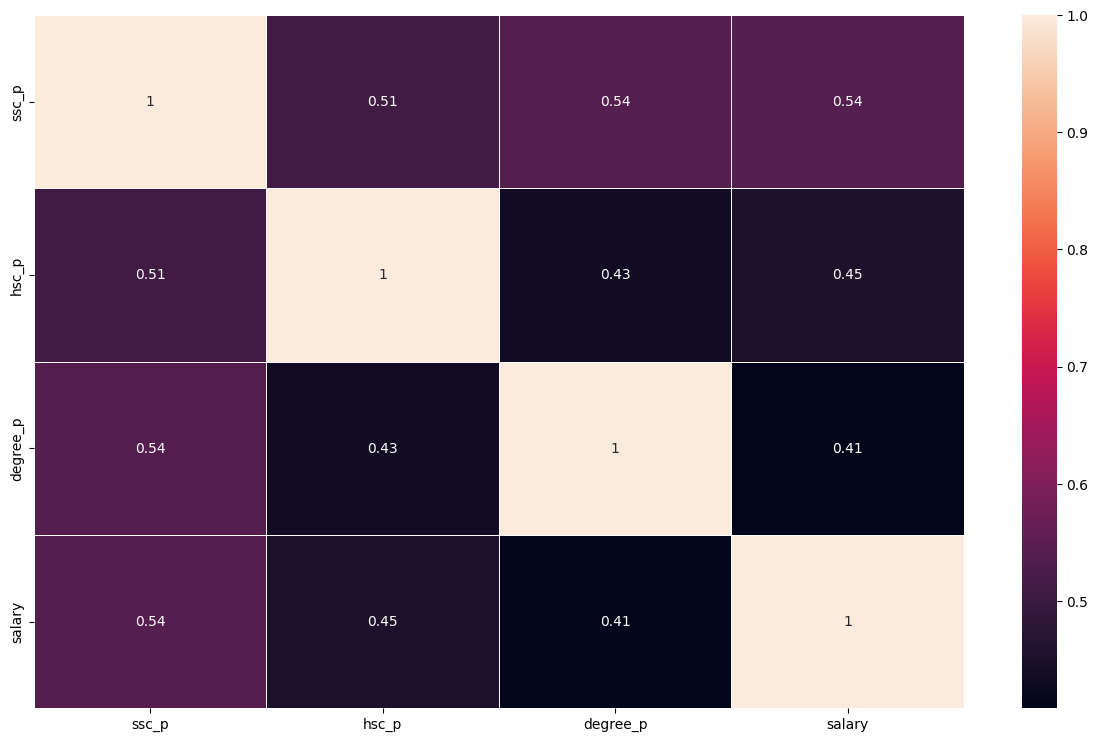

In [6]:
# Pearson correlation
plt.subplots(figsize=(15, 9))
cor = data.corr()
sns.heatmap(cor, annot=True, linewidths=.5)
plt.show()

In [5]:
X = data.iloc[:,0:3].values
X

array([[67.  , 91.  , 58.  ],
       [79.33, 78.33, 77.48],
       [65.  , 68.  , 64.  ],
       [56.  , 52.  , 52.  ],
       [85.8 , 73.6 , 73.3 ],
       [55.  , 49.8 , 67.25],
       [46.  , 49.2 , 79.  ],
       [82.  , 64.  , 66.  ],
       [73.  , 79.  , 72.  ],
       [58.  , 70.  , 61.  ],
       [58.  , 61.  , 60.  ],
       [69.6 , 68.4 , 78.3 ],
       [47.  , 55.  , 65.  ],
       [77.  , 87.  , 59.  ],
       [62.  , 47.  , 50.  ],
       [65.  , 75.  , 69.  ],
       [63.  , 66.2 , 65.6 ],
       [55.  , 67.  , 64.  ],
       [63.  , 66.  , 64.  ],
       [60.  , 67.  , 70.  ],
       [62.  , 65.  , 66.  ],
       [79.  , 76.  , 85.  ],
       [69.8 , 60.8 , 72.23],
       [77.4 , 60.  , 64.74],
       [76.5 , 97.7 , 78.86],
       [52.58, 54.6 , 50.2 ],
       [71.  , 79.  , 66.  ],
       [63.  , 67.  , 66.  ],
       [76.76, 76.5 , 67.5 ],
       [62.  , 67.  , 58.  ],
       [64.  , 73.5 , 73.  ],
       [67.  , 53.  , 65.  ],
       [61.  , 81.  , 66.4 ],
       [87

In [6]:
y = data.iloc[:,-1].values
y

array([270000., 200000., 250000.,      0., 425000.,      0.,      0.,
       252000., 231000.,      0., 260000., 250000.,      0., 218000.,
            0., 200000., 300000.,      0.,      0., 236000., 265000.,
       393000., 360000., 300000., 360000.,      0., 240000., 265000.,
       350000.,      0., 250000.,      0., 278000., 260000.,      0.,
       300000.,      0., 320000., 240000., 411000., 287000.,      0.,
            0., 300000., 200000.,      0.,      0., 204000., 250000.,
            0., 200000.,      0.,      0., 450000., 216000., 220000.,
       240000., 360000., 268000., 265000., 260000., 300000., 240000.,
            0., 240000.,      0., 275000., 275000.,      0., 275000.,
       360000., 240000., 240000., 218000., 336000.,      0., 230000.,
       500000., 270000.,      0., 240000., 300000.,      0., 300000.,
       300000., 400000., 220000.,      0., 210000., 210000., 300000.,
            0., 230000.,      0., 260000., 420000., 300000.,      0.,
       220000.,     

Cost after iteration 0: 12741579098.438799
Cost after iteration 100: 9665042684.759241
Cost after iteration 200: 9494157815.146582
Cost after iteration 300: 9419068505.842527
Cost after iteration 400: 9385747950.09945
Cost after iteration 500: 9370642343.25604
Cost after iteration 600: 9363481150.929773
Cost after iteration 700: 9359785371.455206
Cost after iteration 800: 9357601525.552954
Cost after iteration 900: 9356077565.257198
Learned parameters: [ -611.38035035  -611.38035035  -611.38035035  4611.39794489
  1784.9042675  -3350.68096579]


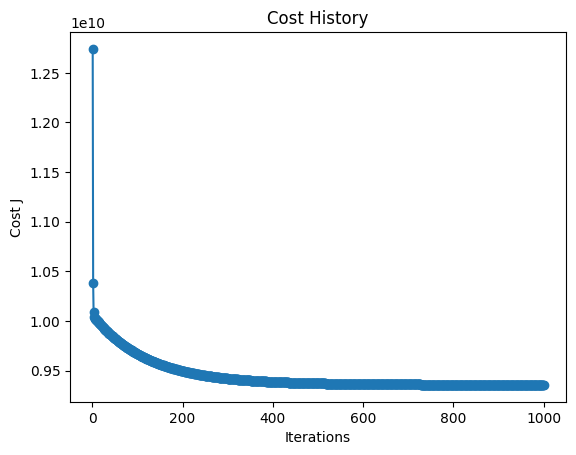

In [9]:
import numpy as np

def compute_cost(X, y, theta):
    m = len(y)
    h = np.dot(X, theta)
    J = (1 / (2 * m)) * np.sum((h - y) ** 2)
    return J

def gradient_descent(X, y, theta, alpha, num_iterations, print_cost=True, print_every=100):
    m = len(y)
    J_history = []

    for i in range(num_iterations):
        h = np.dot(X, theta)
         errors = h - y
        gradient = (1 / m) * np.dot(X.T, errors)  # Use errors.T to transpose errors
        theta = theta - alpha * gradient
        J = compute_cost(X, y, theta)
        J_history.append(J)

        if print_cost and i % print_every == 0:
            print(f"Cost after iteration {i}: {J}")

    return theta, J_history


# Add a column of ones to X for x0
X = np.c_[np.ones(X.shape[0]), X]

# Initialize theta with zeros
theta = np.zeros(X.shape[1])

# Set hyperparameters
alpha = 0.0001
num_iterations = 1000

# Run gradient descent
theta, J_history = gradient_descent(X, y, theta, alpha, num_iterations)

# Print the learned parameters
print("Learned parameters:", theta)

# Optionally, plot the cost history to see convergence
import matplotlib.pyplot as plt
plt.plot(range(1, num_iterations + 1), J_history, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.title('Cost History')
plt.show()
